<a href="https://colab.research.google.com/github/alefts/Chemical-Engineering/blob/main/Feed_batch_reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

In [276]:
#tao=2
#ca0=1.8
k=0.0125  #[L/(mol*s)] CHANGI 2015 
c_mg_0=2.7416
c_mg=c_mg_0   #concentração de MG [mol/L] (considerando inicialmente o reator com 600mL de THF)
c_br_alim=9.196   #concentração do bromo de alimentaçao [mol/L]
#ca2=0.2
#ca3=0.1
# Balanço de massa no reator 
Tr=300 #temperatura inicial do reator  [K]  27C
E=12.20 #ok  [kJ/mol] CHANGI 2015
R=0.008314  #ok [kJ/(mol*K)] 
# Balanço de Energia do Reator
Tj=273.15#273.15 # [K] Condição Experimental    
UA=4.5 # W/K  CHANGI 2015 - Escala laboratório
ror=0.657639 # kg/L ASPEN (REVER!!!!)
Vreac=2 # L CHANGI 2015 
Cpr=1645.09 #J/(kg*K) ASPEN (REVER!!!!)
dHr=-230000 # Referencia delta H formação HOLM 1973 thermochemistry of grignard reagents. -340 antigo J/mol  CHANFI 2015 ?Hrxn was determined to be ?340 kJ/mol for benzyl bromide Grignard reaction using reaction calorimeter experiment
#Balanço na jaqueta
Fj=0.001 # Verificar - Em Bravo 2014 é manipulada em função de Vj - (CHECAR LIVRO DE GRINGARD)
Vj=0.2 # 1/5 de vr - regra heurística Bravo 2014
Tjin=273.15   # Hipótese 0C
Cpj=4190 #J/(kg*K) Água 
roj=1 # kg/L Água
n=1000 # Número de integrações
t=0 # tempo inicial de inteção (s)
dt=10 # passo (s)
c_br=0 # [mol/L] concentração de bromo DENTRO do reator
ca3= 0 # [mol/L] concentração de produto do reator
v0=0.0000745    #1.852e-5 [L/h] Vazão volumétrica de alimentação de Br - Estimativa baseada na planta
vr=0.6  #L - Volume de THF+Mg inicialmente - desprezou volume de Mg
ep=0.11# advanced mixing p 451

Mass transfer properties



In [277]:
dp_0=0.000324   #diâmetro partícula [m] - Patente - OLHAAAAAAAAAAAAAR
dp=dp_0
rol=1080    #massa específica líquido [kg/m3] - água  - OLHAR existe rol e ror - dimensões
visc_d=0.00101    #viscosidade dinâmia [kg/(m*s)] - OLHAR NO ASPEN
D=1    # dimensão do reator [m]
T=1     # dimensão do reator [m]
ro_mg=1738   # massa específica do magnésio [kg/m3]
MM_mg= 24.305    # massa molar (g/mol) - olhar unidade

ros= 1738  #massa específica sólido [kg/m3] - está repetida com ro_mg - mudar
g=9.81 #[m/s^2]
Da=3e-9 # referÊncia - Grignard reagnets- new delopments RICHEY difusividade [m2/s] - Pesquisar difusividade 
Raio=dp/2

Storage lists

In [278]:
t_=[]
vr_=[]
ks_=[]
ksl_=[]
c_mg_=[]
c_br_=[]
ca3_=[]
Tj_=[]
Tr_=[]
dp_=[]


In [279]:

for i in range(n):
    t_.append(t)
    vr_.append(vr)
    c_mg_.append(c_mg)
    c_br_.append(c_br)
    ca3_.append(ca3) 
    Tj_.append(Tj)
    Tr_.append(Tr)
    dp_.append(dp)
       
    t=t+dt
    vr=vr+v0*dt
    
    #estimativa inicial
    Vt=1
    Vt_novo=10
    while abs(Vt_novo-Vt)>0.0001:
        Vt=Vt_novo
        Rep=rol*Vt*dp/visc_d     #Reynold de partícula
        Cd=18.5/(Rep**(3/5))   #coeficiende de arraste
        Vt_novo=np.sqrt(4*g*dp*(ros-rol)/(3*Cd*rol))  #Velocidade terminal
  

    #Adimensionais
    Sc=visc_d/(rol*Da)
    if Vt<0.0005: #m/s
        Rep=rol*(ep**(1/3))*(dp**(4/3))/visc_d
        Sh=2+(0.47*((Rep)**0.62)*(Sc**0.36)*((D/T)**0.17))
    else:
        Sh=2+0.44*(Rep**0.5)*(Sc**0.38)
  
    ksl=Sh*Da/dp
    ks=k*np.exp(E/(R*Tr))
    # ks>>>>>>ksl
    k0=((1/ksl)+(1/ks))**(-1)
    
    ks_.append(ks)
    ksl_.append(ksl)
 

    if vr<0.805:
        c_mg=c_mg+((-k0*c_mg*c_br)-(v0*c_mg/vr))*dt
        c_br=c_br+((-k0*c_mg*c_br)+(v0*(c_br_alim-c_br)/vr))*dt
        ca3=ca3+((k0*c_mg*c_br)-(v0*ca3/vr))*dt
    else:
        c_mg=c_mg+(-k0*c_mg*c_br)*dt
        c_br=c_br+(-k0*c_mg*c_br)*dt
        ca3=ca3+(k0*c_mg*c_br)*dt 
  
  
  
    a=((-UA*(Tr-Tj))/(ror*Vreac*Cpr))
    b= (-dHr*(k0*c_mg*c_br)/(ror*Cpr))
  
  
    c= (Fj*(Tjin-Tj)/Vj)
    d= (UA*(Tr-Tj)/(Cpj*roj*Vj))

  
    Tr=Tr+(a+b)*dt
    Tj=Tj+(c+d)*dt

  
#   if dp(i)>0

#ll=(4*Da*c_br(1)/(((1/(dp(i)/2)-1/(dp(1)/2)))((dp(1)/2)((dp(i)/2)^2)*ros)))
    xb=(c_mg_0-c_mg)/c_mg_0
    dp= ((1-xb)*(dp_0**3))**(1/3)
  

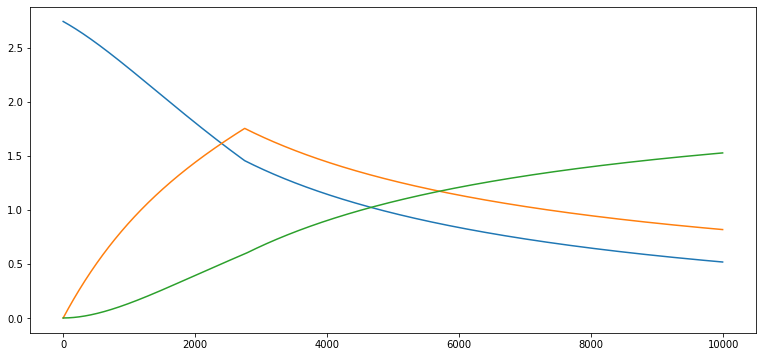

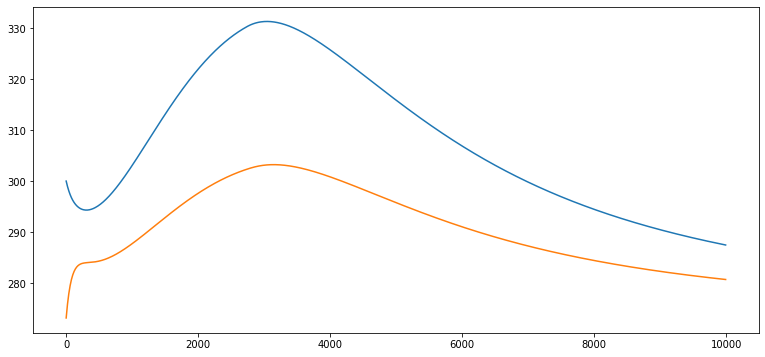

In [280]:
plt.figure(figsize=(13,6))
plt.plot(t_,c_mg_)
plt.plot(t_,c_br_)
plt.plot(t_,ca3_)
plt.show()

plt.figure(figsize=(13,6))
plt.plot(t_,Tr_)
plt.plot(t_,Tj_)
plt.show()
#xlabel('Tempo (s)')
#ylabel('Concentração Mg (mol/L)')
#figure(2)
#plot(t,Tr,t,Tj)
#xlabel('Tempo (s)')
#ylabel('Temperatura do reator (K)')

Result plots

In [281]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,1,1)
line1, = ax1.plot([],[],c='r',marker=',',label="Product")
line2, = ax1.plot([],[],c='b',marker=',',label="Magnesium")
line3, = ax1.plot([],[],c='g',marker=',',label="Bromide")
ax1.set_ylim(np.min(c_mg_)-.5,np.max(c_mg_)+.5)
ax1.set_xlim(0,t_[-1])
ax1.legend()
ax1.set_ylabel("Concentration [mol/L]")
#plt.plot(t_,c_mg_)
#plt.plot(t_,c_br_)
#plt.plot(t_,ca3_)
ax1.set_xticks([])

ax2 = plt.subplot(2,1,2)
line4, = ax2.plot([],[],c='k',marker=',',label="Reactor")
line5, = ax2.plot([],[],c='g',marker=',',label="Jacket")
ax2.set_ylim(np.min(Tj_)-.5,np.max(Tr_)+.5)
ax2.set_xlim(0,t_[-1])
ax2.legend()
ax2.set_ylabel("Temperature [K]")
ax2.set_xlabel("Tempo(s)")
ax2.set_xticks([])

plt.close()

x_data_1=[]
y_data_1=[]

x_data_2=[]
y_data_2=[]

x_data_3=[]
y_data_3=[]

x_data_4=[]
y_data_4=[]

x_data_5=[]
y_data_5=[]

def animate(i):
  global t_,c_br_,Tr_,ca3_,c_mg_,Tj_
  x_data_1.append(t_[i])
  y_data_1.append(ca3_[i])

  x_data_2.append(t_[i])
  y_data_2.append(c_br_[i])
  
  x_data_3.append(t_[i])
  y_data_3.append(c_mg_[i])

  x_data_4.append(t_[i])
  y_data_4.append(Tr_[i])

  x_data_5.append(t_[i])
  y_data_5.append(Tj_[i])

  line1.set_xdata(x_data_1)
  line1.set_ydata(y_data_1)
  line2.set_xdata(x_data_2)
  line2.set_ydata(y_data_2)
  line3.set_xdata(x_data_3)
  line3.set_ydata(y_data_3)
  line4.set_xdata(x_data_4)
  line4.set_ydata(y_data_4)
  line5.set_xdata(x_data_5)
  line5.set_ydata(y_data_5)


  fig.suptitle("Reactor profile at t = {:.0f}s".format(t_[i]*dt),fontsize=12)

  return line,

In [282]:
anim = FuncAnimation(fig,animate,frames=np.arange(0,len(t_),1),interval=7)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)